In [16]:
from symai import Symbol, Expression
from symai.components import FileReader, Execute, Function
from symai.extended import Conversation

# from z3 import Solver, sat
import networkx as nx

In [3]:
problem = Symbol("Bob has two sons, John and Jay. Jay has one brother and father. The father has two sons. Jay's brother has a brother and a father. Who is Jay's brother.")

In [13]:
sentences = [s.strip() for s in problem.value.split(".") if s]

In [15]:
sentences

['Bob has two sons, John and Jay',
 'Jay has one brother and father',
 'The father has two sons',
 "Jay's brother has a brother and a father",
 "Who is Jay's brother"]

In [91]:
txt = """
The Englishman lives in the red house.
The Swede keeps dogs.
The Dane drinks tea.
The green house is just to the left of the white one.
The owner of the green house drinks coffee.
The Pall Mall smoker keeps birds.
The owner of the yellow house smokes Dunhills.
The man in the center house drinks milk.
The Norwegian lives in the first house.
The Blend smoker has a neighbor who keeps cats.
The man who smokes Blue Masters drinks beer.
The man who keeps horses lives next to the Dunhill smoker.
The German smokes Prince.
The Norwegian lives next to the blue house.
The Blend smoker has a neighbor who drinks water.
The question to be answered is: Who keeps fish?
"""
sentences = [s.strip() for s in txt.split("\n") if s]

In [119]:
template = """
For each sentence, identify and extract the following:

(*) nodes: Entities or objects mentioned
(*) types: Categories for each node
(*) relation: Relationships between nodes

For nodes and types use only one word.

Examples: 
    Sentence: "The Englishman lives in the red house."
    Answer: {nodes: Englishman, red house}, {types: nationality, color}, {relation: Englishman -lives in-> red}

    Sentence: "The green house is just to the left of the white one."
    Answer: {nodes: green house, white house}, {types: color, color}, {relation: green -left of-> white}

    Sentence: "The Swede keeps dogs."
    Answer: {nodes: Swede, dogs}, {types: nationality, pet}, {relation: Swede -keeps-> dog}

    Sentence: "The Dane drinks tea."
    Answer: {nodes: Dane, tea}, {types: nationality, beverage}, {relation: Dane -drinks-> tea}
"""

In [120]:
f = Function(template)

In [116]:
def parse(text):    
    # Regex patterns
    nodes_pattern = r"\{nodes: ([\w, ]+)\}"
    types_pattern = r"\{types: ([\w, ]+)\}"
    # relations_pattern = r"(\w+) -(\w+)-> (\w+)"
    # relations_pattern = r"(\w+) -([\w\s]+)-> (\w+)"
    # relations_pattern = r"([\w, ]+) -([\w\s]+)-> ([\w, ]+)"
    relations_pattern = r"(\w[\w\s]*\w) -([\w\s]+)-> (\w[\w\s]*\w)"

    
    
    # Extracting nodes, types, and relations
    nodes = re.findall(nodes_pattern, text)#[0].split(', ')
    types = re.findall(types_pattern, text)#[0].split(', ')
    if nodes: 
        nodes = nodes[0].split(", ")
    if types: 
        types = types[0].split(", ")
        
    relations = re.findall(relations_pattern, text)

    return nodes, types, relations

In [121]:
g = nx.Graph()
for s in sentences: 
    res = f(s)
    try: 
        print("sentence: ", res.value)
        nodes, types, relations = parse(res.value)  
        print("nodes: ", nodes)
        print("types: ", types)
        print("relations: ", relations)
        print()
        for (n, t) in zip(nodes, types): 
            g.add_node(n, type=t)
        for (fr, r, to) in relations: 
            g.add_edge(fr, to, relation=r)
    except Exception as e: print(e)

sentence:  {nodes: Englishman, red house}, {types: nationality, color}, {relation: Englishman -lives in-> red}
nodes:  ['Englishman', 'red house']
types:  ['nationality', 'color']
relations:  [('Englishman', 'lives in', 'red')]

sentence:  {nodes: Swede, dogs}, {types: nationality, pet}, {relation: Swede -keeps-> dogs}
nodes:  ['Swede', 'dogs']
types:  ['nationality', 'pet']
relations:  [('Swede', 'keeps', 'dogs')]

sentence:  {nodes: Dane, tea}, {types: nationality, beverage}, {relation: Dane -drinks-> tea}
nodes:  ['Dane', 'tea']
types:  ['nationality', 'beverage']
relations:  [('Dane', 'drinks', 'tea')]

sentence:  {nodes: green house, white one}, {types: color, color}, {relation: green -left of-> white}
nodes:  ['green house', 'white one']
types:  ['color', 'color']
relations:  [('green', 'left of', 'white')]

sentence:  {nodes: owner, green house, coffee}, {types: occupation, color, beverage}, {relation: owner -drinks-> coffee, owner -owns-> green house}
nodes:  ['owner', 'green h

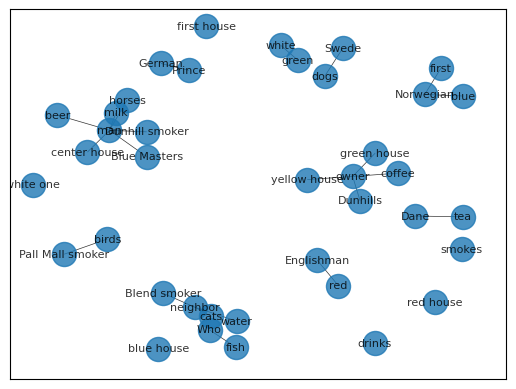

In [122]:
pos = nx.spring_layout(g,k=0.2,iterations=25)
nx.draw_networkx(g, pos=pos, font_size=8, width=0.5, alpha=0.8)

In [69]:
nx.draw_networkx??

Signature: nx.draw_networkx(G, pos=None, arrows=None, with_labels=True, **kwds)
Source:   
def draw_networkx(G, pos=None, arrows=None, with_labels=True, **kwds):
    r"""Draw the graph G using Matplotlib.

    Draw the graph with Matplotlib with options for node positions,
    labeling, titles, and many other drawing features.
    See draw() for simple drawing without labels or axes.

    Parameters
    ----------
    G : graph
        A networkx graph

    pos : dictionary, optional
        A dictionary with nodes as keys and positions as values.
        If not specified a spring layout positioning will be computed.
        See :py:mod:`networkx.drawing.layout` for functions that
        compute node positions.

    arrows : bool or None, optional (default=None)
        If `None`, directed graphs draw arrowheads with
        `~matplotlib.patches.FancyArrowPatch`, while undirected graphs draw edges
        via `~matplotlib.collections.LineCollection` for speed.
        If `True`, draw 